# **PPO with L2 Norm**

In [2]:
import numpy as np
import gymnasium as gym
from coverage_env import CoverageEnv
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from torch.optim import AdamW

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os
import matplotlib.pyplot as plt

In [3]:
env_0 = CoverageEnv(curriculum=0)
env_1 = CoverageEnv(curriculum=1)
env_2 = CoverageEnv(curriculum=2)
env_3 = CoverageEnv(curriculum=3)
env_4 = CoverageEnv(curriculum=4)

In [4]:
policy_kwargs = dict(
    optimizer_class  = AdamW,
    optimizer_kwargs = dict(
        weight_decay = 1e-4
    )
)

# **Environment 0**

In [5]:
model = PPO(
    "MlpPolicy",
    env_0,
    learning_rate = 1e-4,
    n_steps       = 2048,
    batch_size    = 64,
    n_epochs      = 10,
    gamma         = 0.99,
    gae_lambda    = 0.95,
    clip_range    = 0.2,
    ent_coef      = 0.01,
    vf_coef       = 0.5,
    max_grad_norm = 0.5,
    verbose       = 1,
    policy_kwargs = policy_kwargs,
    tensorboard_log="logs/ppo/mlp/l2/coverage_lvl0",
)

# train for 50k timesteps
model.learn(total_timesteps=500_000)

# save it
model.save("models/ppo/l2/mlp_coverage_lvl0")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/ppo/mlp/l2/coverage_lvl0/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 185      |
|    ep_rew_mean     | -155     |
| time/              |          |
|    fps             | 6716     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 175         |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 3261        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015702514 |
|    clip_fraction        | 0.0514      |
|    clip_range

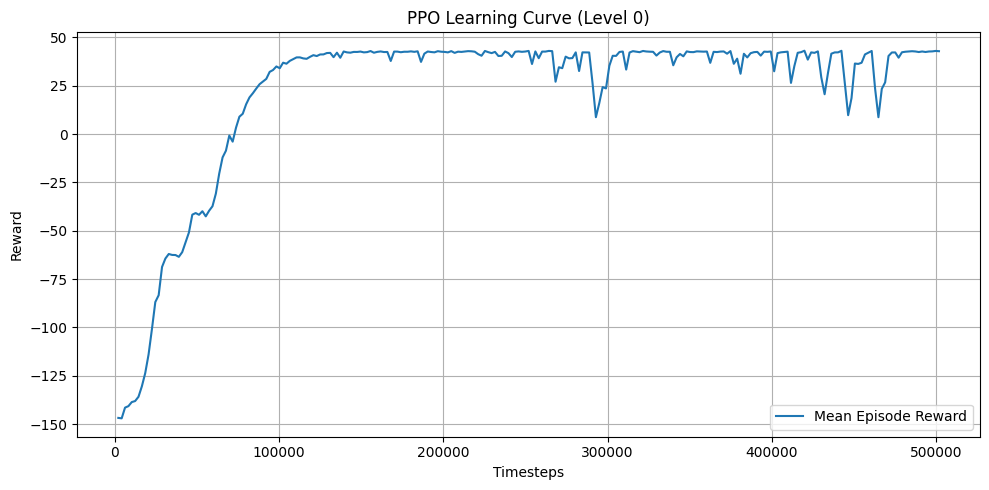

In [6]:
log_dir = "logs/ppo/mlp/l2/coverage_lvl0/PPO_1"
run_id = os.listdir(log_dir)[0]
event_path = os.path.join(log_dir, run_id)

# Load the TensorBoard logs
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# Get 'rollout/ep_rew_mean' scalar events
rewards = event_acc.Scalars("rollout/ep_rew_mean")

# Extract steps and reward values
steps = [event.step for event in rewards]
reward_values = [event.value for event in rewards]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, reward_values, label="Mean Episode Reward")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("PPO Learning Curve (Level 0)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
model = PPO.load("models/ppo/l2/mlp_coverage_lvl0.zip")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_0,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 0 (level the model was last trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_1,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 1: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_2,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 2: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_3,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 3: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_4,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 4: {mean_reward:.2f} +/- {std_reward:.2f}")

Mean reward for level 0 (level the model was last trained on): -27.70 +/- 107.31
Mean reward for level 1: -200.00 +/- 0.00
Mean reward for level 2: -200.00 +/- 0.00
Mean reward for level 3: -198.05 +/- 2.89
Mean reward for level 4: -200.00 +/- 0.00


# **Environment 1**

In [8]:
# Load the pretrained model from curriculum 0
model = PPO.load(
    "models/ppo/l2/mlp_coverage_lvl0.zip", 
    env=env_1, 
    learning_rate = 1e-4,
    n_steps       = 2048,
    batch_size    = 64,
    n_epochs      = 10,
    gamma         = 0.99,
    gae_lambda    = 0.95,
    clip_range    = 0.2,
    ent_coef      = 0.01,
    vf_coef       = 0.5,
    max_grad_norm = 0.5,
    verbose       = 1,
    policy_kwargs = policy_kwargs,
    tensorboard_log="logs/ppo/mlp/l2/coverage_lvl1",
    # Let the model continue training to see if it carries the learning
    exploration_initial_eps=0.05,
    exploration_final_eps=0.05,
)

# Evaluate the model
mean_reward, std_reward = evaluate_policy(
    model, 
    env_1, 
    n_eval_episodes=20, 
    deterministic=True,
)
print(f"Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Mean reward: -198.95 ± 3.19


In [9]:
# Continue training on level 1
model.learn(total_timesteps=500_000)

# Save the fine-tuned model
model.save("models/ppo/l2/mlp_coverage_lvl1")

Logging to logs/ppo/mlp/l2/coverage_lvl1/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -199     |
| time/              |          |
|    fps             | 6572     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 200        |
|    ep_rew_mean          | -198       |
| time/                   |            |
|    fps                  | 3660       |
|    iterations           | 2          |
|    time_elapsed         | 1          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01476609 |
|    clip_fraction        | 0.0634     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.2       |
|    explained_variance   | 0.591      

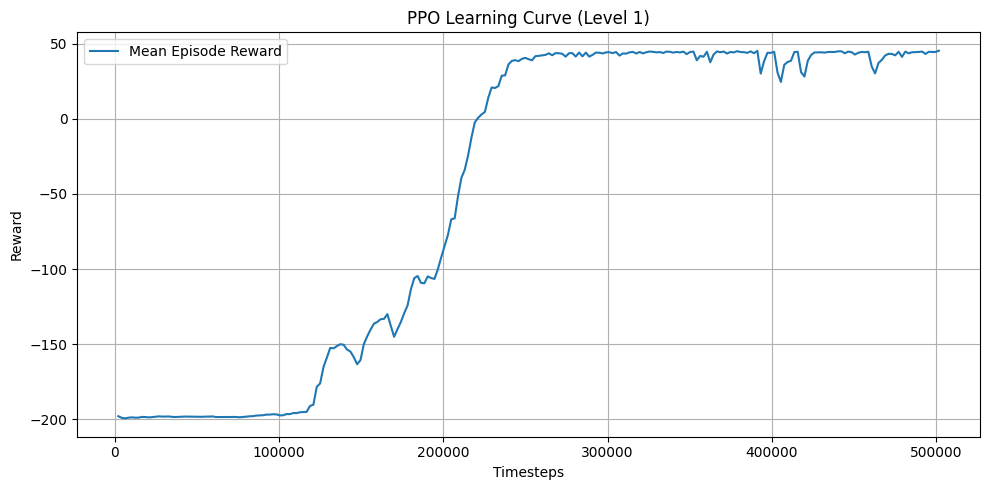

In [10]:
log_dir = "logs/ppo/mlp/l2/coverage_lvl1/PPO_1"
run_id = os.listdir(log_dir)[0]
event_path = os.path.join(log_dir, run_id)

# Load the TensorBoard logs
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# Get 'rollout/ep_rew_mean' scalar events
rewards = event_acc.Scalars("rollout/ep_rew_mean")

# Extract steps and reward values
steps = [event.step for event in rewards]
reward_values = [event.value for event in rewards]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, reward_values, label="Mean Episode Reward")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("PPO Learning Curve (Level 1)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
model = PPO.load("models/ppo/l2/mlp_coverage_lvl1.zip")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_0,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 0 (level the model was trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_1,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 1 (level the model was last trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_2,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 2: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_3,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 3: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_4,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 4: {mean_reward:.2f} +/- {std_reward:.2f}")

Mean reward for level 0 (level the model was trained on): -196.55 +/- 5.13
Mean reward for level 1 (level the model was last trained on): 45.10 +/- 1.70
Mean reward for level 2: -200.00 +/- 0.00
Mean reward for level 3: -199.25 +/- 2.30
Mean reward for level 4: -199.10 +/- 1.92


# **Environment 2**

In [12]:
# Load the pretrained model from curriculum 0
model = PPO.load(
    "models/ppo/l2/mlp_coverage_lvl1.zip", 
    env=env_2, 
    learning_rate = 1e-4,
    n_steps       = 2048,
    batch_size    = 64,
    n_epochs      = 10,
    gamma         = 0.99,
    gae_lambda    = 0.95,
    clip_range    = 0.2,
    ent_coef      = 0.01,
    vf_coef       = 0.5,
    max_grad_norm = 0.5,
    verbose       = 1,
    policy_kwargs = policy_kwargs,
    tensorboard_log="logs/ppo/mlp/l2/coverage_lvl2",
    # Let the model continue training to see if it carries the learning
    exploration_initial_eps=0.05,
    exploration_final_eps=0.05,
)

# Evaluate the model
mean_reward, std_reward = evaluate_policy(
    model, 
    env_2, 
    n_eval_episodes=20, 
    deterministic=True,
)
print(f"Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Mean reward: -200.00 ± 0.00


In [13]:
# Continue training on level 1
model.learn(total_timesteps=500_000)

# Save the fine-tuned model
model.save("models/ppo/l2/mlp_coverage_lvl2")

Logging to logs/ppo/mlp/l2/coverage_lvl2/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -200     |
| time/              |          |
|    fps             | 7020     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -200        |
| time/                   |             |
|    fps                  | 3825        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008518513 |
|    clip_fraction        | 0.041       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.106      |
|    explained_variance  

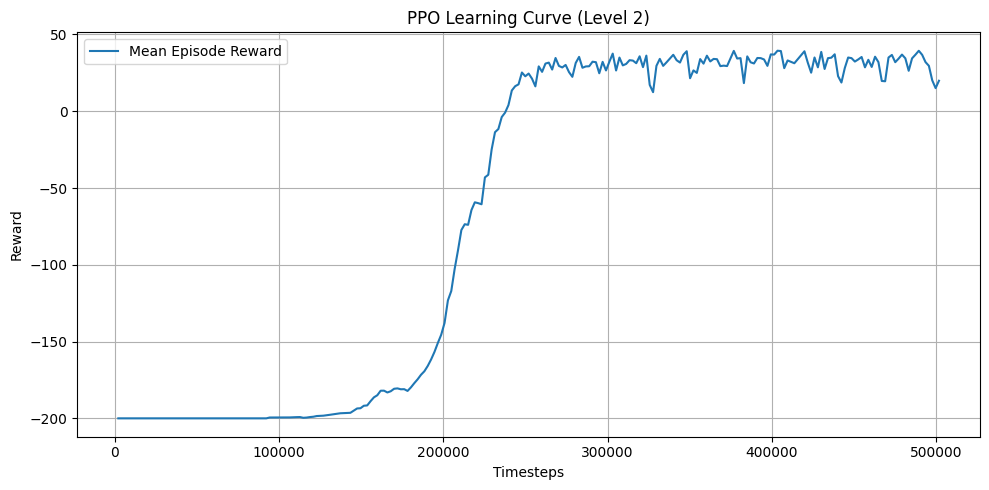

In [14]:
log_dir = "logs/ppo/mlp/l2/coverage_lvl2/PPO_1"
run_id = os.listdir(log_dir)[0]
event_path = os.path.join(log_dir, run_id)

# Load the TensorBoard logs
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# Get 'rollout/ep_rew_mean' scalar events
rewards = event_acc.Scalars("rollout/ep_rew_mean")

# Extract steps and reward values
steps = [event.step for event in rewards]
reward_values = [event.value for event in rewards]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, reward_values, label="Mean Episode Reward")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("PPO Learning Curve (Level 2)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
model = PPO.load("models/ppo/l2/mlp_coverage_lvl2.zip")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_0,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 0 (level the model was trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_1,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 1 (level the model was trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_2,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 2 (level the model was last trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_3,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 3: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_4,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 4: {mean_reward:.2f} +/- {std_reward:.2f}")

Mean reward for level 0 (level the model was trained on): -199.70 +/- 1.31
Mean reward for level 1 (level the model was trained on): -196.70 +/- 5.10
Mean reward for level 2 (level the model was last trained on): 16.45 +/- 69.25
Mean reward for level 3: -199.85 +/- 0.65
Mean reward for level 4: -199.85 +/- 0.65


# **Environment 3**

In [16]:
# Load the pretrained model from curriculum 0
model = PPO.load(
    "models/ppo/l2/mlp_coverage_lvl2.zip", 
    env=env_3, 
    learning_rate = 1e-4,
    n_steps       = 2048,
    batch_size    = 64,
    n_epochs      = 10,
    gamma         = 0.99,
    gae_lambda    = 0.95,
    clip_range    = 0.2,
    ent_coef      = 0.01,
    vf_coef       = 0.5,
    max_grad_norm = 0.5,
    verbose       = 1,
    policy_kwargs = policy_kwargs,
    tensorboard_log="logs/ppo/mlp/l2/coverage_lvl3",
    # Let the model continue training to see if it carries the learning
    exploration_initial_eps=0.05,
    exploration_final_eps=0.05,
)

# Evaluate the model
mean_reward, std_reward = evaluate_policy(
    model, 
    env_3, 
    n_eval_episodes=20,
    deterministic=True,
)
print(f"Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Mean reward: -199.55 ± 1.96


In [17]:
# Continue training on level 1
model.learn(total_timesteps=500_000)

# Save the fine-tuned model
model.save("models/ppo/l2/mlp_coverage_lvl3")

Logging to logs/ppo/mlp/l2/coverage_lvl3/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -200     |
| time/              |          |
|    fps             | 6841     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -199        |
| time/                   |             |
|    fps                  | 3670        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013776211 |
|    clip_fraction        | 0.0625      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.24       |
|    explained_variance  

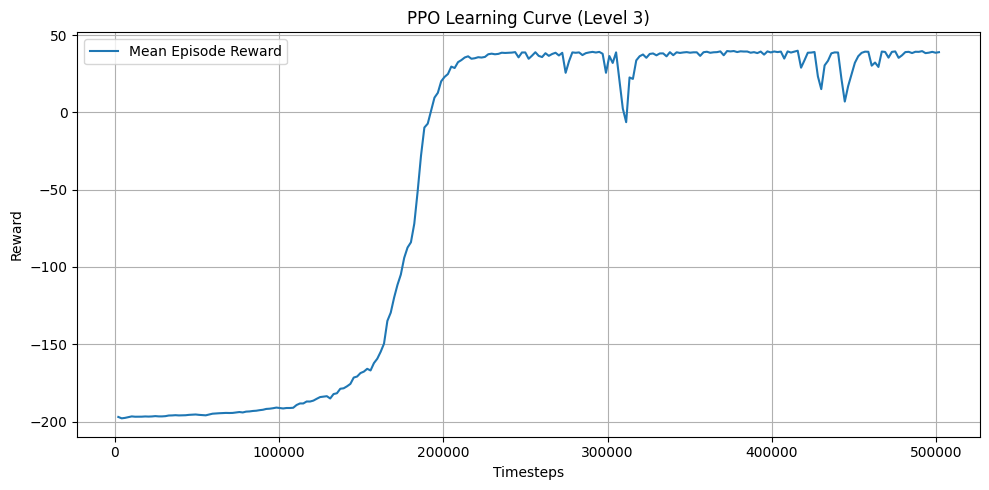

In [18]:
log_dir = "logs/ppo/mlp/l2/coverage_lvl3/PPO_1"
run_id = os.listdir(log_dir)[0]
event_path = os.path.join(log_dir, run_id)

# Load the TensorBoard logs
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# Get 'rollout/ep_rew_mean' scalar events
rewards = event_acc.Scalars("rollout/ep_rew_mean")

# Extract steps and reward values
steps = [event.step for event in rewards]
reward_values = [event.value for event in rewards]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, reward_values, label="Mean Episode Reward")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("PPO Learning Curve (Level 3)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
model = PPO.load("models/ppo/l2/mlp_coverage_lvl3.zip")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_0,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 0 (level the model was trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_1,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 1 (level the model was trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_2,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 2 (level the model was trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_3,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 3 (level the model was last trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_4,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 4: {mean_reward:.2f} +/- {std_reward:.2f}")

Mean reward for level 0 (level the model was trained on): -194.60 +/- 2.62
Mean reward for level 1 (level the model was trained on): -197.90 +/- 3.69
Mean reward for level 2 (level the model was trained on): -148.50 +/- 95.68
Mean reward for level 3 (level the model was last trained on): 37.40 +/- 3.17
Mean reward for level 4: -200.00 +/- 0.00


# **Environment 4**

In [20]:
# Load the pretrained model from curriculum 0
model = PPO.load(
    "models/ppo/l2/mlp_coverage_lvl3.zip", 
    env=env_4, 
    learning_rate = 1e-4,
    n_steps       = 2048,
    batch_size    = 64,
    n_epochs      = 10,
    gamma         = 0.99,
    gae_lambda    = 0.95,
    clip_range    = 0.2,
    ent_coef      = 0.01,
    vf_coef       = 0.5,
    max_grad_norm = 0.5,
    verbose       = 1,
    policy_kwargs = policy_kwargs,
    tensorboard_log="logs/ppo/mlp/l2/coverage_lvl4",
    # Let the model continue training to see if it carries the learning
    exploration_initial_eps=0.05,
    exploration_final_eps=0.05,
)

# Evaluate the model
mean_reward, std_reward = evaluate_policy(
    model, 
    env_4, 
    n_eval_episodes=20,
    deterministic=True,
)
print(f"Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Mean reward: -200.00 ± 0.00


In [21]:
# Continue training on level 1
model.learn(total_timesteps=500_000)

# Save the fine-tuned model
model.save("models/ppo/l2/mlp_coverage_lvl4")

Logging to logs/ppo/mlp/l2/coverage_lvl4/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -200     |
| time/              |          |
|    fps             | 7146     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 200        |
|    ep_rew_mean          | -200       |
| time/                   |            |
|    fps                  | 3924       |
|    iterations           | 2          |
|    time_elapsed         | 1          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.11552405 |
|    clip_fraction        | 0.101      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.151     |
|    explained_variance   | 0.588      

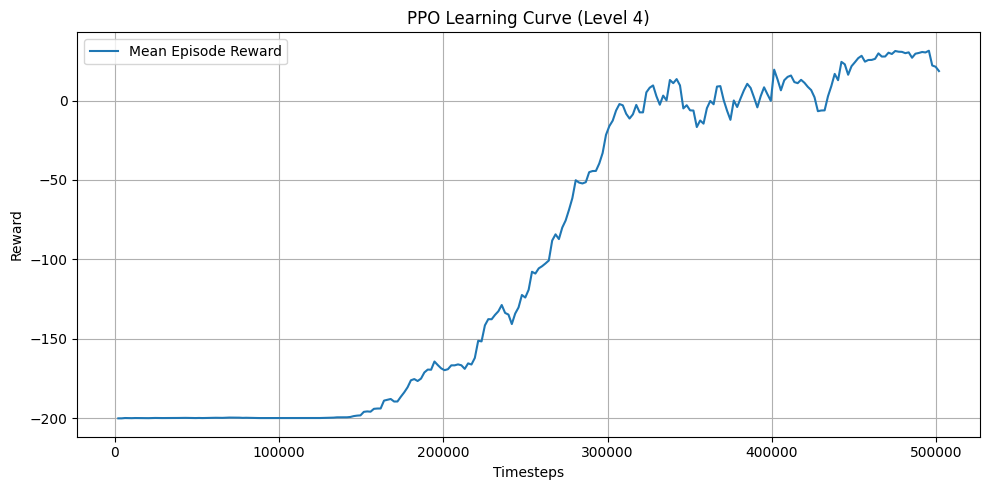

In [22]:
log_dir = "logs/ppo/mlp/l2/coverage_lvl4/PPO_1"
run_id = os.listdir(log_dir)[0]
event_path = os.path.join(log_dir, run_id)

# Load the TensorBoard logs
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# Get 'rollout/ep_rew_mean' scalar events
rewards = event_acc.Scalars("rollout/ep_rew_mean")

# Extract steps and reward values
steps = [event.step for event in rewards]
reward_values = [event.value for event in rewards]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, reward_values, label="Mean Episode Reward")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("PPO Learning Curve (Level 4)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
model = PPO.load("models/ppo/l2/mlp_coverage_lvl4.zip")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_0,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 0 (level the model was trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_1,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 1 (level the model was trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_2,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 2 (level the model was trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_3,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 3 (level the model was trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward, std_reward = evaluate_policy(
    model, 
    env_4,
    n_eval_episodes=20, 
    deterministic=True,
)

print(f"Mean reward for level 4 (level the model was last trained on): {mean_reward:.2f} +/- {std_reward:.2f}")

/Users/pedropertusi/Desktop/7-semestre/reinforcement-learning/projeto-intermediario-p-j-cpp/env/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward for level 0 (level the model was trained on): -194.30 +/- 4.54
Mean reward for level 1 (level the model was trained on): -191.60 +/- 4.51
Mean reward for level 2 (level the model was trained on): -198.65 +/- 3.21
Mean reward for level 3 (level the model was trained on): -185.30 +/- 50.57
Mean reward for level 4 (level the model was last trained on): -4.00 +/- 80.73


# **Final Graph**

In [24]:
print(os.listdir("logs/ppo/mlp"))

['l2', 'no_l2']


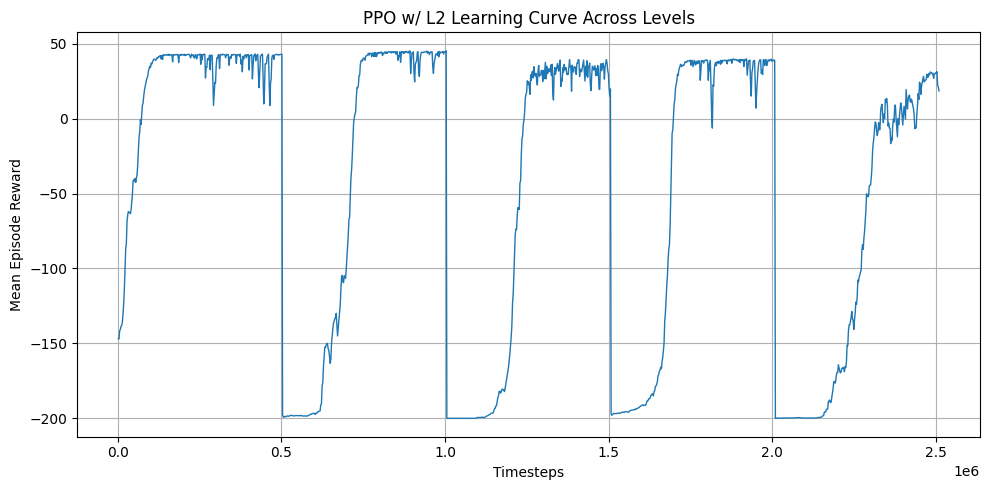

In [28]:
log_dir = "logs/ppo/mlp/l2"

run_dirs = sorted(
    [d for d in os.listdir(log_dir) if d.startswith("coverage_")],
    key=lambda x: int(x.split("lvl")[-1])
)

all_steps, all_rewards = [], []
offset = 0


for run in run_dirs:
    path = os.path.join(log_dir, run, "PPO_1")
    ea = EventAccumulator(path)
    ea.Reload()
    scalars = ea.Scalars("rollout/ep_rew_mean")
    steps  = [e.step  for e in scalars]
    rewards= [e.value for e in scalars]

    shifted = [s + offset for s in steps]

    all_steps  += shifted
    all_rewards+= rewards

    offset += max(steps)

plt.figure(figsize=(10,5))
plt.plot(all_steps, all_rewards, linewidth=1)
plt.xlabel("Timesteps")
plt.ylabel("Mean Episode Reward")
plt.title("PPO w/ L2 Learning Curve Across Levels")
plt.grid(True)
plt.tight_layout()
plt.savefig("ppo_l2_learning_curve_across_levels.png")
plt.show()

